In [62]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.optimize import curve_fit
from scipy import stats


In [105]:
data=np.loadtxt('Dge1.5steep.cat')
data2=np.loadtxt('/Users/Mehdi/Dropbox/SPASS/main/D_15_steep.cat')
z2=data2[:,0]
d2=data2[:,1]
nvpi=data[:,0]
sppi=data[:,1]
z=data[:,2]
depol=data[:,3]
der=data[:,4]

In [64]:
def pi1func (z,c1,c2):
    l1=0.2
    pi0=0.03
    return pi0*np.exp(-1.0*c1*l1**4/(1+z)**4-c2*l1**4)
def pi1func_onecomp (z,c1):
    l1=0.2
    pi0=0.03
    return pi0*np.exp(-1.0*c1*l1**4/(1+z)**4)
def pi1func2 (z,c1,beta):
    l1=0.2
    pi0=0.03
    return pi0*np.exp(-1.0*c1*(1+z)**beta*l1**4/(1+z)**4)
def pi2func (z,c1,c2):
    l2=0.13
    pi0=0.03
    return pi0*np.exp(-1.0*c1*l2**4/(1+z)**4-c2*l2**4)
def pi2func_onecomp (z,c1):
    l2=0.13
    pi0=0.03
    return pi0*np.exp(-1.0*c1*l2**4/(1+z)**4)
def pi2func2 (z,c1,beta):
    l2=0.13
    pi0=0.03
    return pi0*np.exp(-1.0*c1*(1+z)**beta*l2**4/(1+z)**4)
def depfunc (z,c1,c2):
    l1=0.2
    l2=0.13
    pi0=0.03
    pi1=pi0*np.exp(-1.0*c1*l1**4/(1+z)**4-c2*l1**4)
    pi2=pi0*np.exp(-1.0*c1*l2**4/(1+z)**4-c2*l2**4)
    return pi2/pi1
def depfunc_onecomp (z,c1):
    l1=0.2
    l2=0.13
    pi0=0.03
    pi1=pi0*np.exp(-1.0*c1*l1**4/(1+z)**4)
    pi2=pi0*np.exp(-1.0*c1*l2**4/(1+z)**4)
    return pi2/pi1
def depfunc2 (z,c3,beta):
    l1=0.2
    l2=0.13
    pi0=0.03
    pi1=pi0*np.exp(-1.0*c3*(1+z)**beta*l1**4/(1+z)**4)
    pi2=pi0*np.exp(-1.0*c3*(1+z)**beta*l2**4/(1+z)**4)
    return pi2/pi1

In [65]:
c, cov = curve_fit(depfunc, z, depol)#,sigma=der)
c_one, cov_one = curve_fit(depfunc_onecomp,z,depol)#,sigma=der)
c3, cov3=curve_fit(depfunc2,z,depol)

/Users/Mehdi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in divide
/Users/Mehdi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: divide by zero encountered in divide


In [66]:
print c
print c_one
print c3



[ 618.42492538  770.55702299]
[ 1569.5782228]
[ 1270.99231019     3.34247769]


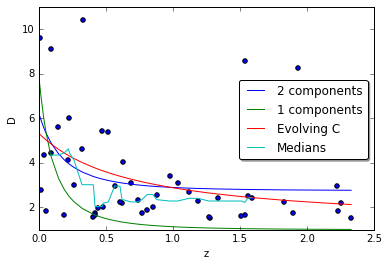

In [67]:
fig1=plt.scatter(z,depol)
fig1=plt.plot(np.sort(z),depfunc(np.sort(z),c[0],c[1]),label='2 components')
fig1=plt.plot(np.sort(z),depfunc_onecomp(np.sort(z),c_one),label='1 components')
fig1=plt.plot(np.sort(z),depfunc2(np.sort(z),c3[0],c3[1]),label='Evolving C')

plt.xlabel('z')
plt.ylabel('D')
plt.xlim(0,2.5)
plt.ylim(1,11)


num=np.size(z)
n=10
s1=num/n
dlocft=np.empty(0)
mdft=np.empty(0)
mdstdft=np.empty(0)
zgdft=z
depgdft=depol
iddsort=np.argsort(zgdft)
zgdft=zgdft[iddsort]
depgdft=depgdft[iddsort]

for i in range(num-n-1):
   dlocft=np.append(dlocft,np.median(zgdft[i : i+n-1])) 
   mdft=np.append(mdft,np.median(depgdft[i : i+n-1])) 
fig1=plt.plot(dlocft,mdft,label='Medians')

plt.legend(loc='upper right',bbox_to_anchor=[1,0.7],ncol=1,shadow=True,fancybox=True)

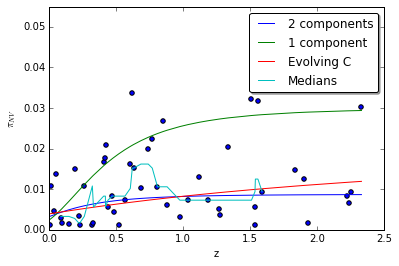

In [68]:
fig2=plt.scatter(z,nvpi)
plt.xlabel('z')
plt.ylabel(r'$\pi_{NV}$')
plt.xlim(0,2.5)
plt.ylim(0,0.055)
fig2=plt.plot(np.sort(z),pi1func(np.sort(z),c[0],c[1]),label='2 components')
fig2=plt.plot(np.sort(z),pi1func_onecomp(np.sort(z),c_one),label='1 component')
fig2=plt.plot(np.sort(z),pi1func2(np.sort(z),c3[0],c3[1]),label='Evolving C')

num=np.size(z)
n=10
s1=num/n
dlocft=np.empty(0)
mdft=np.empty(0)
mdstdft=np.empty(0)
zgdft=z
depgdft=nvpi
iddsort=np.argsort(zgdft)
zgdft=zgdft[iddsort]
depgdft=depgdft[iddsort]

for i in range(num-n-1):
   dlocft=np.append(dlocft,np.median(zgdft[i : i+n-1])) 
   mdft=np.append(mdft,np.median(depgdft[i : i+n-1])) 
fig2=plt.plot(dlocft,mdft,label='Medians')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)

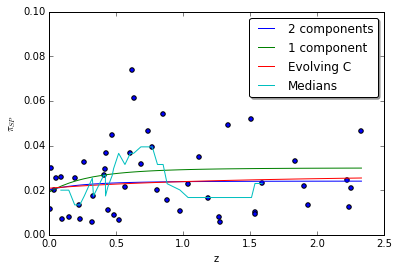

In [69]:
fig3=plt.scatter(z,sppi)
plt.xlabel('z')
plt.ylabel(r'$\pi_{SP}$')
plt.xlim(0,2.5)
plt.ylim(0,0.1)
fig3=plt.plot(np.sort(z),pi2func(np.sort(z),c[0],c[1]),label='2 components')
fig3=plt.plot(np.sort(z),pi2func_onecomp(np.sort(z),c_one),label='1 component')
fig3=plt.plot(np.sort(z),pi2func2(np.sort(z),c3[0],c3[1]),label='Evolving C')

num=np.size(z)
n=10
s1=num/n
dlocft=np.empty(0)
mdft=np.empty(0)
mdstdft=np.empty(0)
zgdft=z
depgdft=sppi
iddsort=np.argsort(zgdft)
zgdft=zgdft[iddsort]
depgdft=depgdft[iddsort]

for i in range(num-n-1):
   dlocft=np.append(dlocft,np.median(zgdft[i : i+n-1])) 
   mdft=np.append(mdft,np.median(depgdft[i : i+n-1])) 
fig3=plt.plot(dlocft,mdft,label='Medians')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)

# KS test on D and z

In [152]:
# This function accepts  a Numpy arrays with N elements, and make a 1D array of M*N elements with random order. 
def randomize(x,M):
    Xdeck=np.repeat(x,M,axis=0)
    np.random.shuffle(Xdeck)
    np.random.shuffle(Xdeck)
    return Xdeck

In [153]:
medz=np.median(z)
half1=depol[np.where(z< medz)]
half2=depol[np.where(z>= medz)]
#ks_main=stats.ks_2samp(half1,half2)
ks_main=stats.mstats.ks_twosamp(half2,half1)
print ks_main
rho00, sp_value00 =stats.spearmanr(z,depol)
print 'Spearman rank correlation ', rho00
print 'Spearman p-value', sp_value00


(0.41999999999999998, 0.026599704506935218)
Spearman rank correlation  -0.359814276707
Spearman p-value 0.0111055844108


In [112]:
print medz2

0.684


In [154]:
num=100000
D_random=randomize(depol,num)
print np.shape(D_random)
z_random=randomize(z,num)

(4900000,)


In [155]:
ks0=np.zeros(num)-1
pval=np.zeros(num)-1
rhoo=np.zeros(num)-1
spvalue=np.zeros(num)-1
for i in range(num):
    j=i*len(z)
    zi=z_random[j:j+len(z)]
    dep=D_random[j:j+len(z)]
    medz=np.median(zi)
    half1=dep[np.where(zi < medz )]
    half2=dep[np.where(zi >= medz)]
    res1=stats.mstats.ks_twosamp(half1,half2)
    ks0[i]=res1[0]
    pval[i]=res1[1]
    res2=stats.spearmanr(zi,dep)
    rhoo[i] =res2[0]
    spvalue[i]=res2[1]

print 'Done!'

Done!


In [162]:
howmany2=np.where(ks0 >=ks_main[0])
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the KS statistic using D>1.5 an alpha<-0.5  for the simulation is', frac2 
print len(howmany2[0])

howmany22=np.where(np.absolute(rhoo) >=np.absolute(rho00))
frac22=len(howmany22[0])/float(num)
print 'The simulated p-vale for the Spearman rho in D using D>1.5 an alpha<-0.5  for the simulation is', frac22 
print len(howmany22[0])

The simulated p-vale for the KS statistic using D>1.5 an alpha<-0.5  for the simulation is 0.01544
1544
The simulated p-vale for the Spearman rho in D using D>1.5 an alpha<-0.5  for the simulation is 0.01111
1111


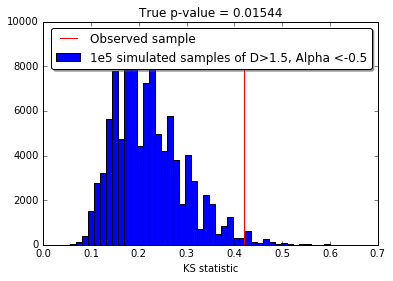

In [157]:
fig1=plt.hist(ks0,bins=50,label='1e5 simulated samples of D>1.5, Alpha <-0.5')
plt.title('True p-value = 0.01544')
plt.xlabel('KS statistic')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_Steep-D>1.5.png')


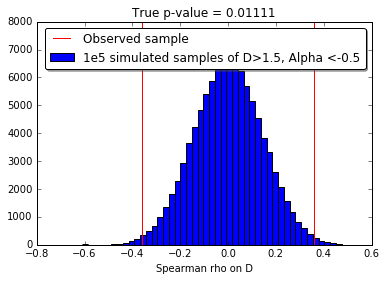

In [163]:
fig11=plt.hist(rhoo,bins=50,label='1e5 simulated samples of D>1.5, Alpha <-0.5')
plt.title('True p-value = 0.01111')
plt.xlabel('Spearman rho on D')
plt.plot([rho00,rho00],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho00,-1*rho00],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_D_Steep-D>1.5.png')

# KS test pi_NV and z


In [159]:
medz=np.median(z)
half1=nvpi[np.where(z< medz)]
half2=nvpi[np.where(z>= medz)]
#ks_main1=stats.ks_2samp(half1,half2)
ks_main1=stats.mstats.ks_twosamp(half2,half1)
print ks_main1
rho0, sp_value0 =stats.spearmanr(z,nvpi)
print 'Spearman rank correlation ', rho0
print 'Spearman p-value', sp_value0

(0.29999999999999999, 0.2204070652259805)
Spearman rank correlation  0.256656431424
Spearman p-value 0.075048541984


In [136]:
print half1
print half2

[ 0.0016  0.0108  0.0033  0.0107  0.0152  0.0012  0.0012  0.0044  0.0056
  0.0012  0.0168  0.0012  0.0138  0.0073  0.0337  0.0083  0.0046  0.021
  0.0017  0.0151  0.0014  0.0162  0.0102  0.0028  0.0178]
[ 0.0094  0.0067  0.0094  0.0073  0.0012  0.0031  0.0016  0.0198  0.0061
  0.0083  0.0057  0.0106  0.0125  0.0205  0.0223  0.0318  0.0129  0.0268
  0.0036  0.0323  0.0073  0.0303  0.0148  0.0051]


In [84]:
num=100000
nvpi_random=randomize(nvpi,num)
z_random=randomize(z,num)
print np.shape(nvpi_random)


(4900000,)


In [160]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(z)
    zi=z_random[j:j+len(z)]
    nvpi1=nvpi_random[j:j+len(z)]
    medz=np.median(zi)
    half1=nvpi1[np.where(zi < medz )]
    half2=nvpi1[np.where(zi >= medz)]
    res1=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res1[0]
    pval[i]=res1[1]
    res2=stats.spearmanr(zi,nvpi1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'

Done!


In [164]:
howmany3=np.where(ks1 >=ks_main1[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in NVPI using D>1.5 an alpha<-0.5  for the simulation is', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=rho0)
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in NVPI using D>1.5 an alpha<-0.5  for the simulation is', frac33 
print len(howmany33[0])

The simulated p-vale for the KS statistic in NVPI using D>1.5 an alpha<-0.5  for the simulation is 0.1473
14730
The simulated p-vale for the Spearman rho in NVPI using D>1.5 an alpha<-0.5  for the simulation is 0.07513
7513


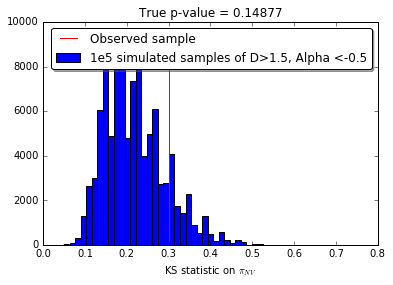

In [100]:
fig2=plt.hist(ks1,bins=50,label='1e5 simulated samples of D>1.5, Alpha <-0.5')
plt.title('True p-value = 0.14877')
plt.xlabel('KS statistic on $\pi_{NV}$')
plt.plot([ks_main1[0],ks_main1[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_pinv_Steep-D>1.5.png')

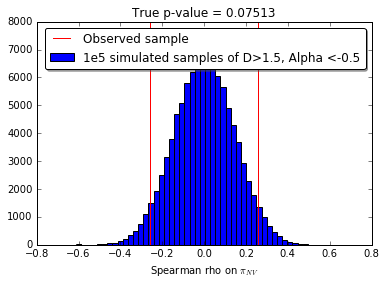

In [165]:
fig3=plt.hist(rho,bins=50,label='1e5 simulated samples of D>1.5, Alpha <-0.5')
plt.title('True p-value = 0.07513')
plt.xlabel('Spearman rho on $\pi_{NV}$')
plt.plot([rho0,rho0],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho0,-1*rho0],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_pinv_Steep-D>1.5.png')